## Predicting Compressive Strength of Concrete

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=d3751566435c036d9cddc199c5722b4992e28996457956b674b501ecf46c1826
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [3]:
from pyforest import*
lazy_imports()

['from sklearn.model_selection import cross_val_score',
 'import nltk',
 'import textblob',
 'import statsmodels.api as sm',
 'from sklearn.model_selection import GridSearchCV',
 'import lightgbm as lgb',
 'from sklearn.preprocessing import RobustScaler',
 'import statistics',
 'import skimage',
 'import sklearn',
 'import imutils',
 'from dask import dataframe as dd',
 'from sklearn.manifold import TSNE',
 'import matplotlib.pyplot as plt',
 'import cv2',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.linear_model import LassoCV',
 'import numpy as np',
 'import datetime as dt',
 'from sklearn.preprocessing import MinMaxScaler',
 'import fbprophet',
 'import torch',
 'import pydot',
 'from sklearn.impute import SimpleImputer',
 'import os',
 'from sklearn.decomposition import PCA',
 'import sys',
 'import re',
 'import pickle',
 'import bokeh',
 'from PIL import Image',
 'from pathlib import Path',
 'import plotly.graph_objs as go',
 'from sklearn.model_select

In [4]:
df=pd.read_csv("/content/Concrete_Data.csv")

<IPython.core.display.Javascript object>

In [5]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [7]:
df=df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"Cement",
             'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"Slag",
             'Fly Ash (component 3)(kg in a m^3 mixture)':"Ash",
             'Water  (component 4)(kg in a m^3 mixture)':"Water",
             'Superplasticizer (component 5)(kg in a m^3 mixture)':"Superplasticizer",
             'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"Coarseagg",
             'Fine Aggregate (component 7)(kg in a m^3 mixture)':"Fineagg",
             "Age (day)":'Age',
             "Concrete compressive strength(MPa, megapascals) ":"Strength"
            })

In [8]:
df

,Cement,Slag,Ash,Water,Superplasticizer,Coarseagg,Fineagg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [9]:
df.dtypes

Cement              float64
Slag                float64
Ash                 float64
Water               float64
Superplasticizer    float64
Coarseagg           float64
Fineagg             float64
Age                   int64
Strength            float64
dtype: object

In [10]:
df.shape

(1030, 9)

In [11]:
df.isnull().sum()

Cement              0
Slag                0
Ash                 0
Water               0
Superplasticizer    0
Coarseagg           0
Fineagg             0
Age                 0
Strength            0
dtype: int64

In [12]:
df.describe()

,Cement,Slag,Ash,Water,Superplasticizer,Coarseagg,Fineagg,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


We can see that cement , slag and ash are left skewed

## Exploratory Data Analysis

In [13]:
## Cement
from scipy import stats
Q1=df['Cement'].quantile(q=0.25)
Q3=df['Cement'].quantile(q=0.75)
print("1st Quartile (Q1) is",Q1)
print("3rd Quartile (Q3) is",Q3)
print("Interquartile Range (IQR) is",stats.iqr(df['Cement']))

1st Quartile (Q1) is 192.375
3rd Quartile (Q3) is 350.0
Interquartile Range (IQR) is 157.625


In [14]:
## Outlier Detection in Cement
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+(1.5)*(Q3-Q1)
print("Lower limit of outliers",L_outliers)
print("Upper limit of outliers",U_outliers)

Lower limit of outliers -44.0625
Upper limit of outliers 586.4375


In [15]:
## Checking for number and percentage of upper and lower outliers
print("Number of lower outliers",df[df['Cement']<-44.0625]['Cement'].count())
print("Number of upper outliers",df[df['Cement']>586.4375].count()['Cement'])
print("Percentage of lower outliers",df[df['Cement']<-44.0625]['Cement'] .count()//len(df))
print("Percentage of upper outliers",df[df['Cement']>586.4375]['Cement'].count()//len(df))

Number of lower outliers 0
Number of upper outliers 0
Percentage of lower outliers 0
Percentage of upper outliers 0


<IPython.core.display.Javascript object>

<Axes: >

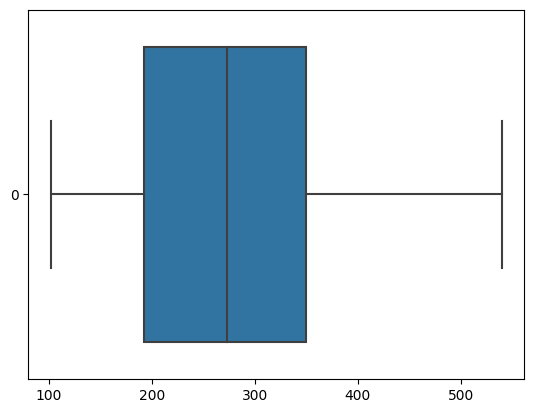

In [16]:
## Cement
sns.boxplot(data=df['Cement'],orient='h')

<IPython.core.display.Javascript object>

<Axes: xlabel='Cement', ylabel='Density'>

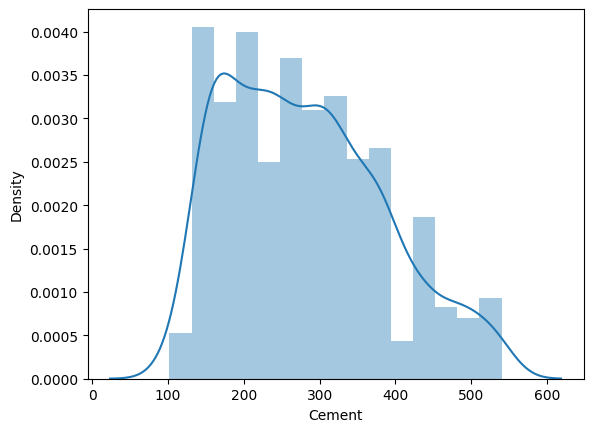

In [17]:
## Distplot for Cement
sns.distplot(df['Cement'])

In [18]:
## Ash
Q1=df['Ash'].quantile(q=0.25)
Q3=df['Ash'].quantile(q=0.75)
print("1st Quartile (Q1) is",Q1)
print("3rd Quartile (Q3) is",Q3)
print("Interquartile Range (IQR) is",stats.iqr(df['Ash']))

1st Quartile (Q1) is 0.0
3rd Quartile (Q3) is 118.3
Interquartile Range (IQR) is 118.3


In [19]:
## Outlier Detection in Ash
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+(1.5)*(Q3-Q1)
print("Lower limit of outliers",L_outliers)
print("Upper limit of outliers",U_outliers)

Lower limit of outliers -177.45
Upper limit of outliers 295.75


In [20]:
## Checking for number and percentage of upper and lower outliers for Ash
print("Number of lower outliers",df[df['Ash']<-177.45]['Ash'].count())
print("Number of upper outliers",df[df['Ash']>295.75].count()['Ash'])
print("Percentage of lower outliers",df[df['Ash']<-177.45]['Ash'] .count()//len(df))
print("Percentage of upper outliers",df[df['Ash']>295.75]['Ash'].count()//len(df))

Number of lower outliers 0
Number of upper outliers 0
Percentage of lower outliers 0
Percentage of upper outliers 0


<IPython.core.display.Javascript object>

<Axes: >

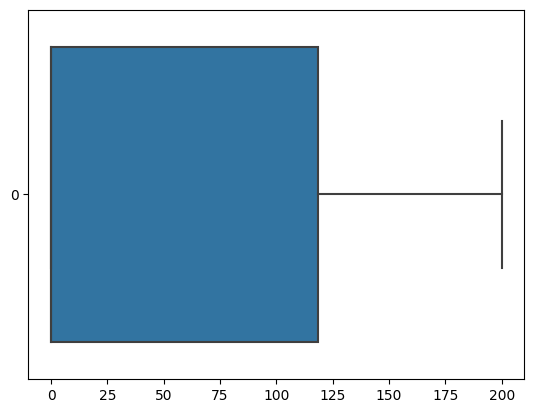

In [21]:
## Ash
sns.boxplot(data=df['Ash'],orient='h')

<IPython.core.display.Javascript object>

<Axes: xlabel='Ash', ylabel='Density'>

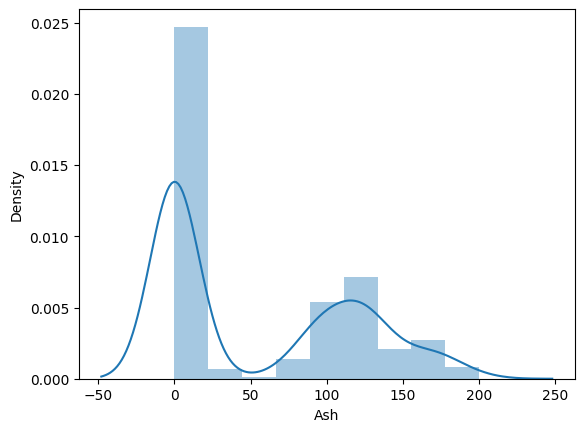

In [22]:
## Distplot for Ash
sns.distplot(df['Ash'])

In [23]:
## Water
Q1=df['Water'].quantile(q=0.25)
Q3=df['Water'].quantile(q=0.75)
print("1st Quartile (Q1) is",Q1)
print("3rd Quartile (Q3) is",Q3)
print("Interquartile Range (IQR) is",stats.iqr(df['Water']))

1st Quartile (Q1) is 164.9
3rd Quartile (Q3) is 192.0
Interquartile Range (IQR) is 27.099999999999994


In [24]:
## Outlier Detection in Water
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+(1.5)*(Q3-Q1)
print("Lower limit of outliers",L_outliers)
print("Upper limit of outliers",U_outliers)

Lower limit of outliers 124.25000000000001
Upper limit of outliers 232.64999999999998


In [25]:
## Checking for number and percentage of upper and lower outliers for Water
print("Number of lower outliers",df[df['Water']<124.25000000000001]['Water'].count())
print("Number of upper outliers",df[df['Water']>232.64999999999998].count()['Water'])
print("Percentage of lower outliers",df[df['Water']<124.25000000000001]['Water'] .count()//len(df))
print("Percentage of upper outliers",df[df['Water']>232.64999999999998]['Water'].count()//len(df))

Number of lower outliers 5
Number of upper outliers 4
Percentage of lower outliers 0
Percentage of upper outliers 0


<IPython.core.display.Javascript object>

<Axes: >

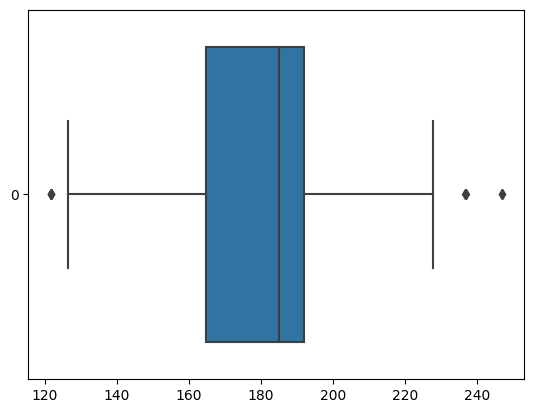

In [26]:
## Water
sns.boxplot(data=df['Water'],orient='h')

<IPython.core.display.Javascript object>

<Axes: xlabel='Water', ylabel='Density'>

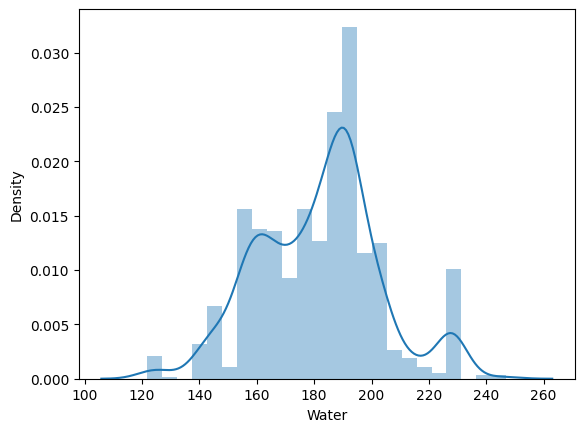

In [27]:
## Distplot for Water
sns.distplot(df['Water'])

In [28]:
## Slag
Q1=df['Slag'].quantile(q=0.25)
Q3=df['Slag'].quantile(q=0.75)
print("1st Quartile (Q1) is",Q1)
print("3rd Quartile (Q3) is",Q3)
print("Interquartile Range (IQR) is",stats.iqr(df['Slag']))

1st Quartile (Q1) is 0.0
3rd Quartile (Q3) is 142.95
Interquartile Range (IQR) is 142.95


In [29]:
## Outlier Detection in Slag
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+(1.5)*(Q3-Q1)
print("Lower limit of outliers",L_outliers)
print("Upper limit of outliers",U_outliers)

Lower limit of outliers -214.42499999999998
Upper limit of outliers 357.375


In [30]:
## Checking for number and percentage of upper and lower outliers for Slag
print("Number of lower outliers",df[df['Slag']<-214.42499999999998]['Slag'].count())
print("Number of upper outliers",df[df['Slag']>357.375].count()['Slag'])
print("Percentage of lower outliers",df[df['Slag']<-214.42499999999998]['Slag'] .count()//len(df))
print("Percentage of upper outliers",df[df['Slag']>357.375]['Slag'].count()//len(df))

Number of lower outliers 0
Number of upper outliers 2
Percentage of lower outliers 0
Percentage of upper outliers 0


<IPython.core.display.Javascript object>

<Axes: >

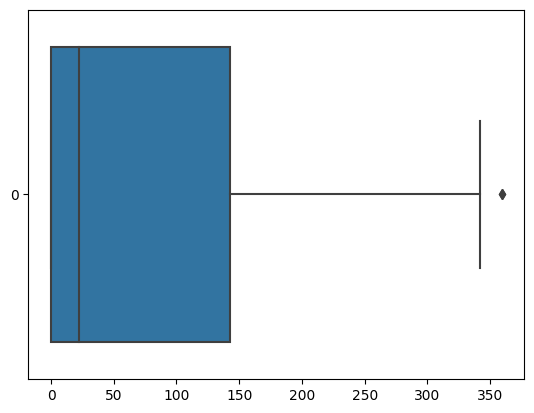

In [31]:
## Slag
sns.boxplot(data=df['Slag'],orient='h')

<IPython.core.display.Javascript object>

<Axes: xlabel='Slag', ylabel='Density'>

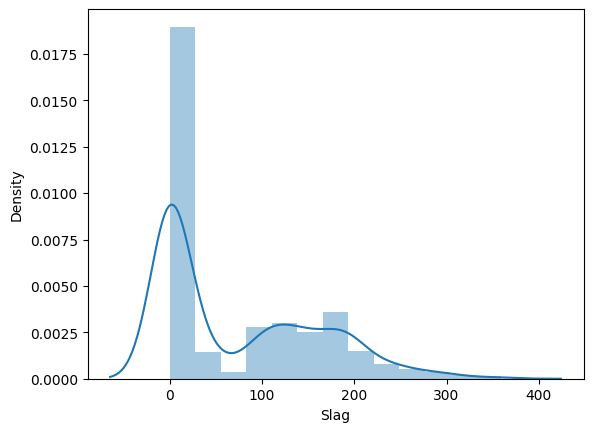

In [32]:
## Distplot for Slag
sns.distplot(df['Slag'])

In [33]:
## Age
Q1=df['Age'].quantile(q=0.25)
Q3=df['Age'].quantile(q=0.75)
print("1st Quartile (Q1) is",Q1)
print("3rd Quartile (Q3) is",Q3)
print("Interquartile Range (IQR) is",stats.iqr(df['Age']))

1st Quartile (Q1) is 7.0
3rd Quartile (Q3) is 56.0
Interquartile Range (IQR) is 49.0


In [34]:
## Outlier Detection in Age
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+(1.5)*(Q3-Q1)
print("Lower limit of outliers",L_outliers)
print("Upper limit of outliers",U_outliers)

Lower limit of outliers -66.5
Upper limit of outliers 129.5


In [35]:
## Checking for number and percentage of upper and lower outliers for Age
print("Number of lower outliers",df[df['Age']<-66.5]['Age'].count())
print("Number of upper outliers",df[df['Age']>129.5].count()['Age'])
print("Percentage of lower outliers",df[df['Age']<-66.5]['Age'] .count()//len(df))
print("Percentage of upper outliers",df[df['Age']>129.5]['Age'].count()//len(df))

Number of lower outliers 0
Number of upper outliers 59
Percentage of lower outliers 0
Percentage of upper outliers 0


<IPython.core.display.Javascript object>

<Axes: >

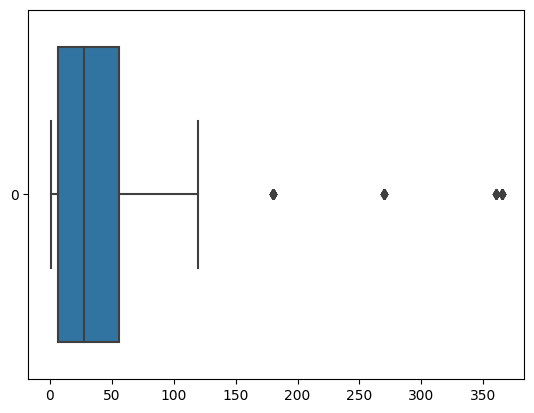

In [36]:
## Age
sns.boxplot(data=df['Age'],orient='h')

<IPython.core.display.Javascript object>

<Axes: xlabel='Age', ylabel='Density'>

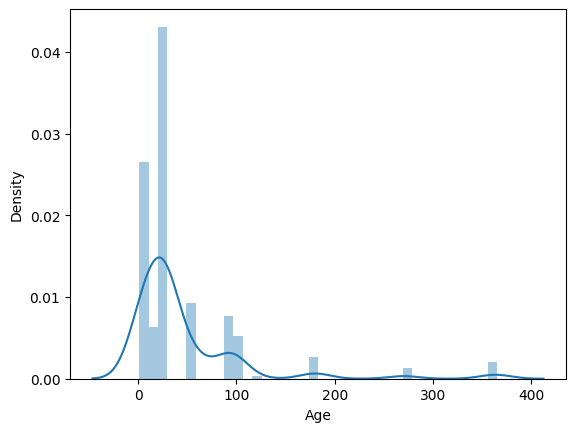

In [37]:
## Distplot for Age
sns.distplot(df['Age'])

In [38]:
df.columns

Index(['Cement', 'Slag', 'Ash', 'Water', 'Superplasticizer', 'Coarseagg',
       'Fineagg', 'Age', 'Strength'],
      dtype='object')

### Multivariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Strength', ylabel='Density'>

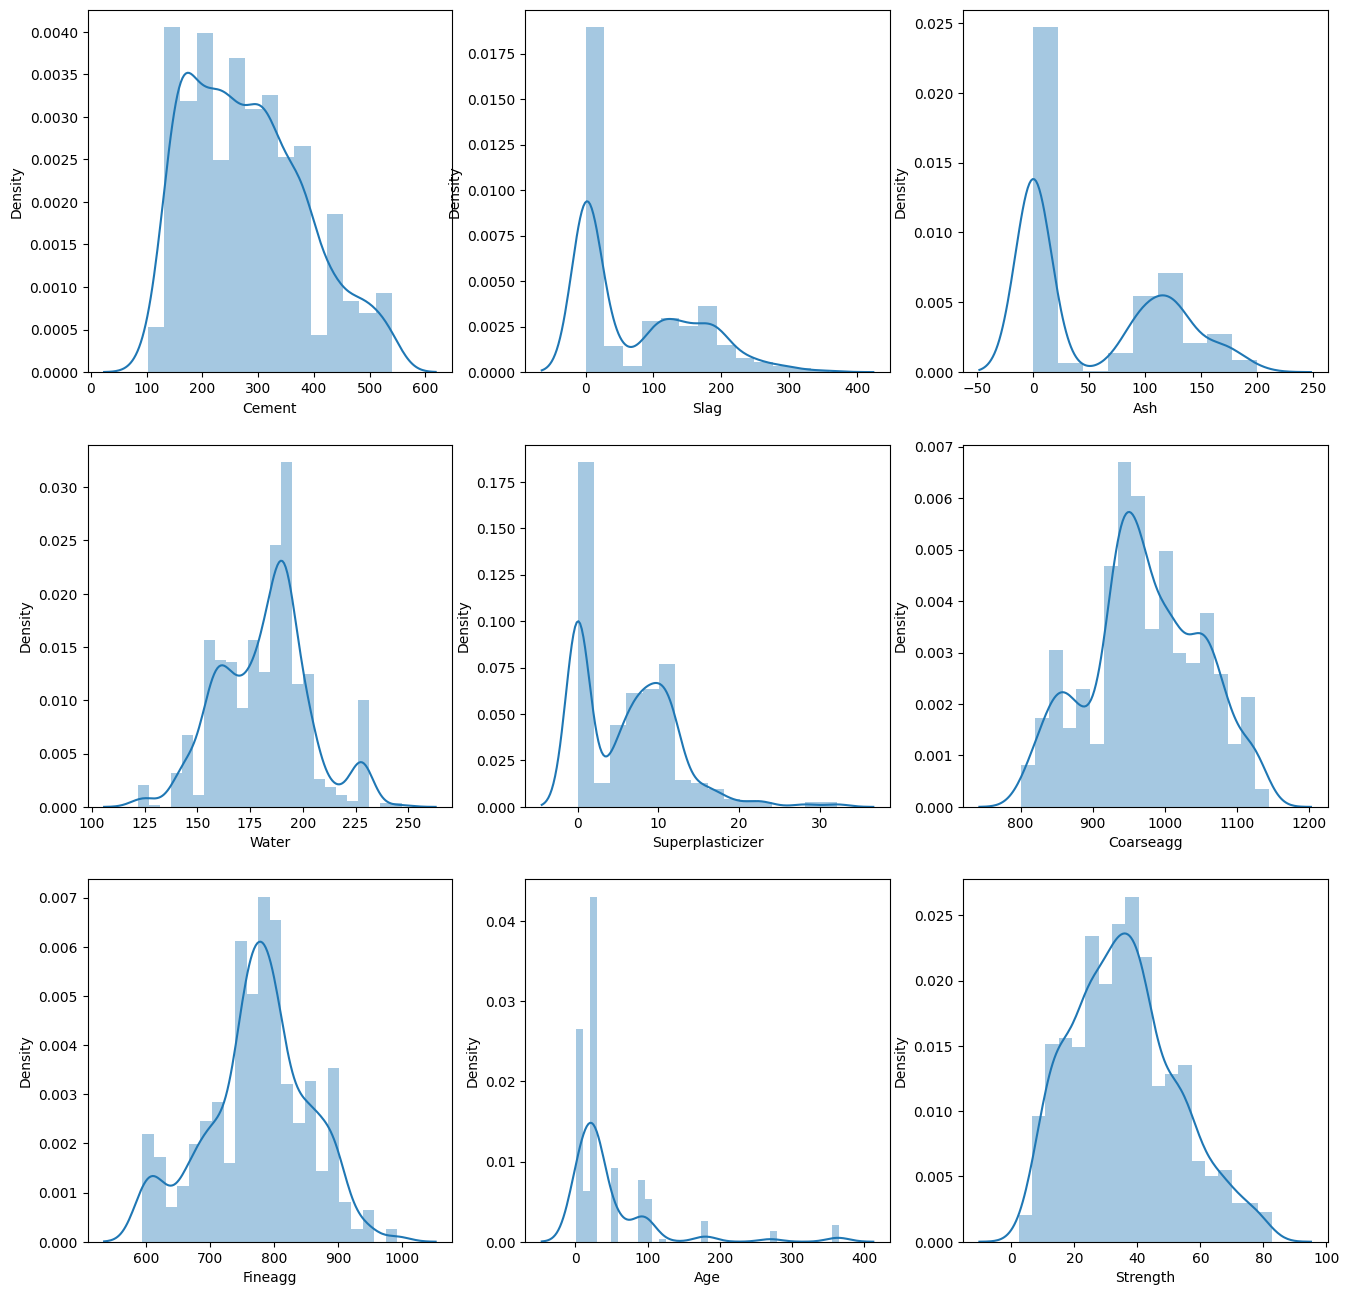

In [39]:
## Distplot
fig, ax2=plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['Cement'],ax=ax2[0][0])
sns.distplot(df['Slag'],ax=ax2[0][1])
sns.distplot(df['Ash'],ax=ax2[0][2])
sns.distplot(df['Water'],ax=ax2[1][0])
sns.distplot(df['Superplasticizer'],ax=ax2[1][1])
sns.distplot(df['Coarseagg'],ax=ax2[1][2])
sns.distplot(df['Fineagg'],ax=ax2[2][0])
sns.distplot(df['Age'],ax=ax2[2][1])
sns.distplot(df['Strength'],ax=ax2[2][2])

<IPython.core.display.Javascript object>

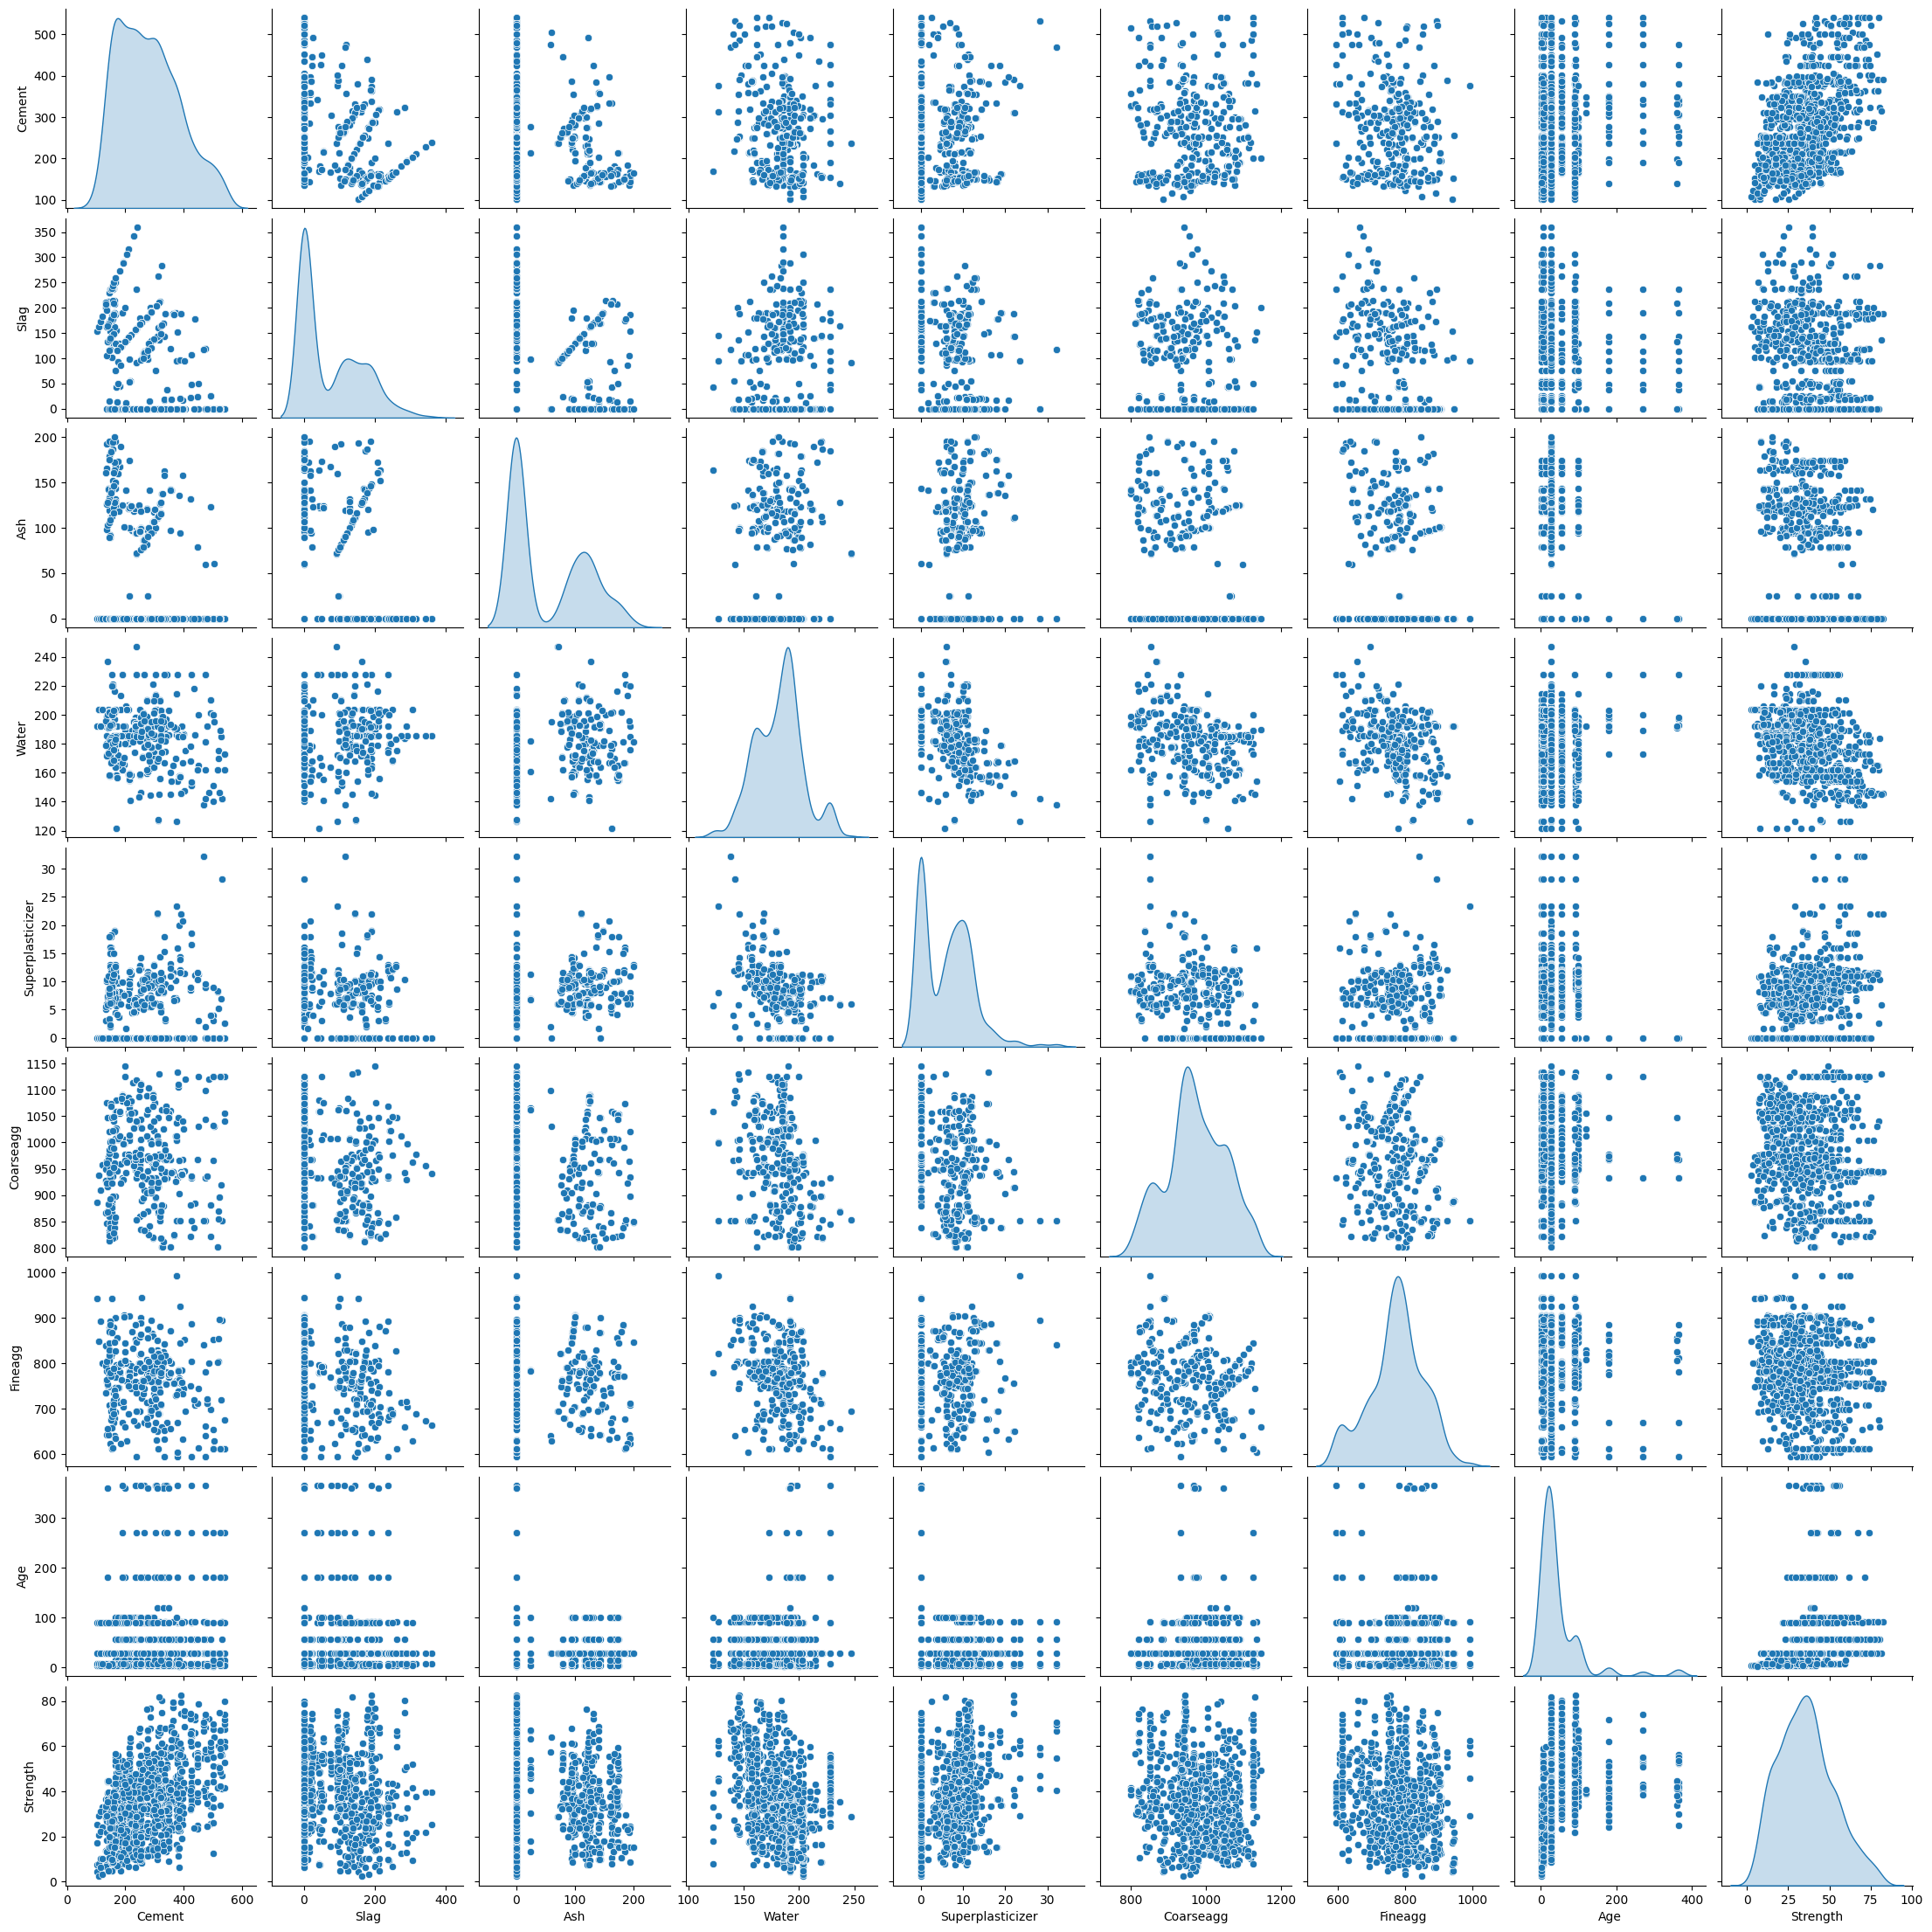

In [40]:
sns.pairplot(df,diag_kind='kde')

## Correlation between Variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Correlation Between different attributes')

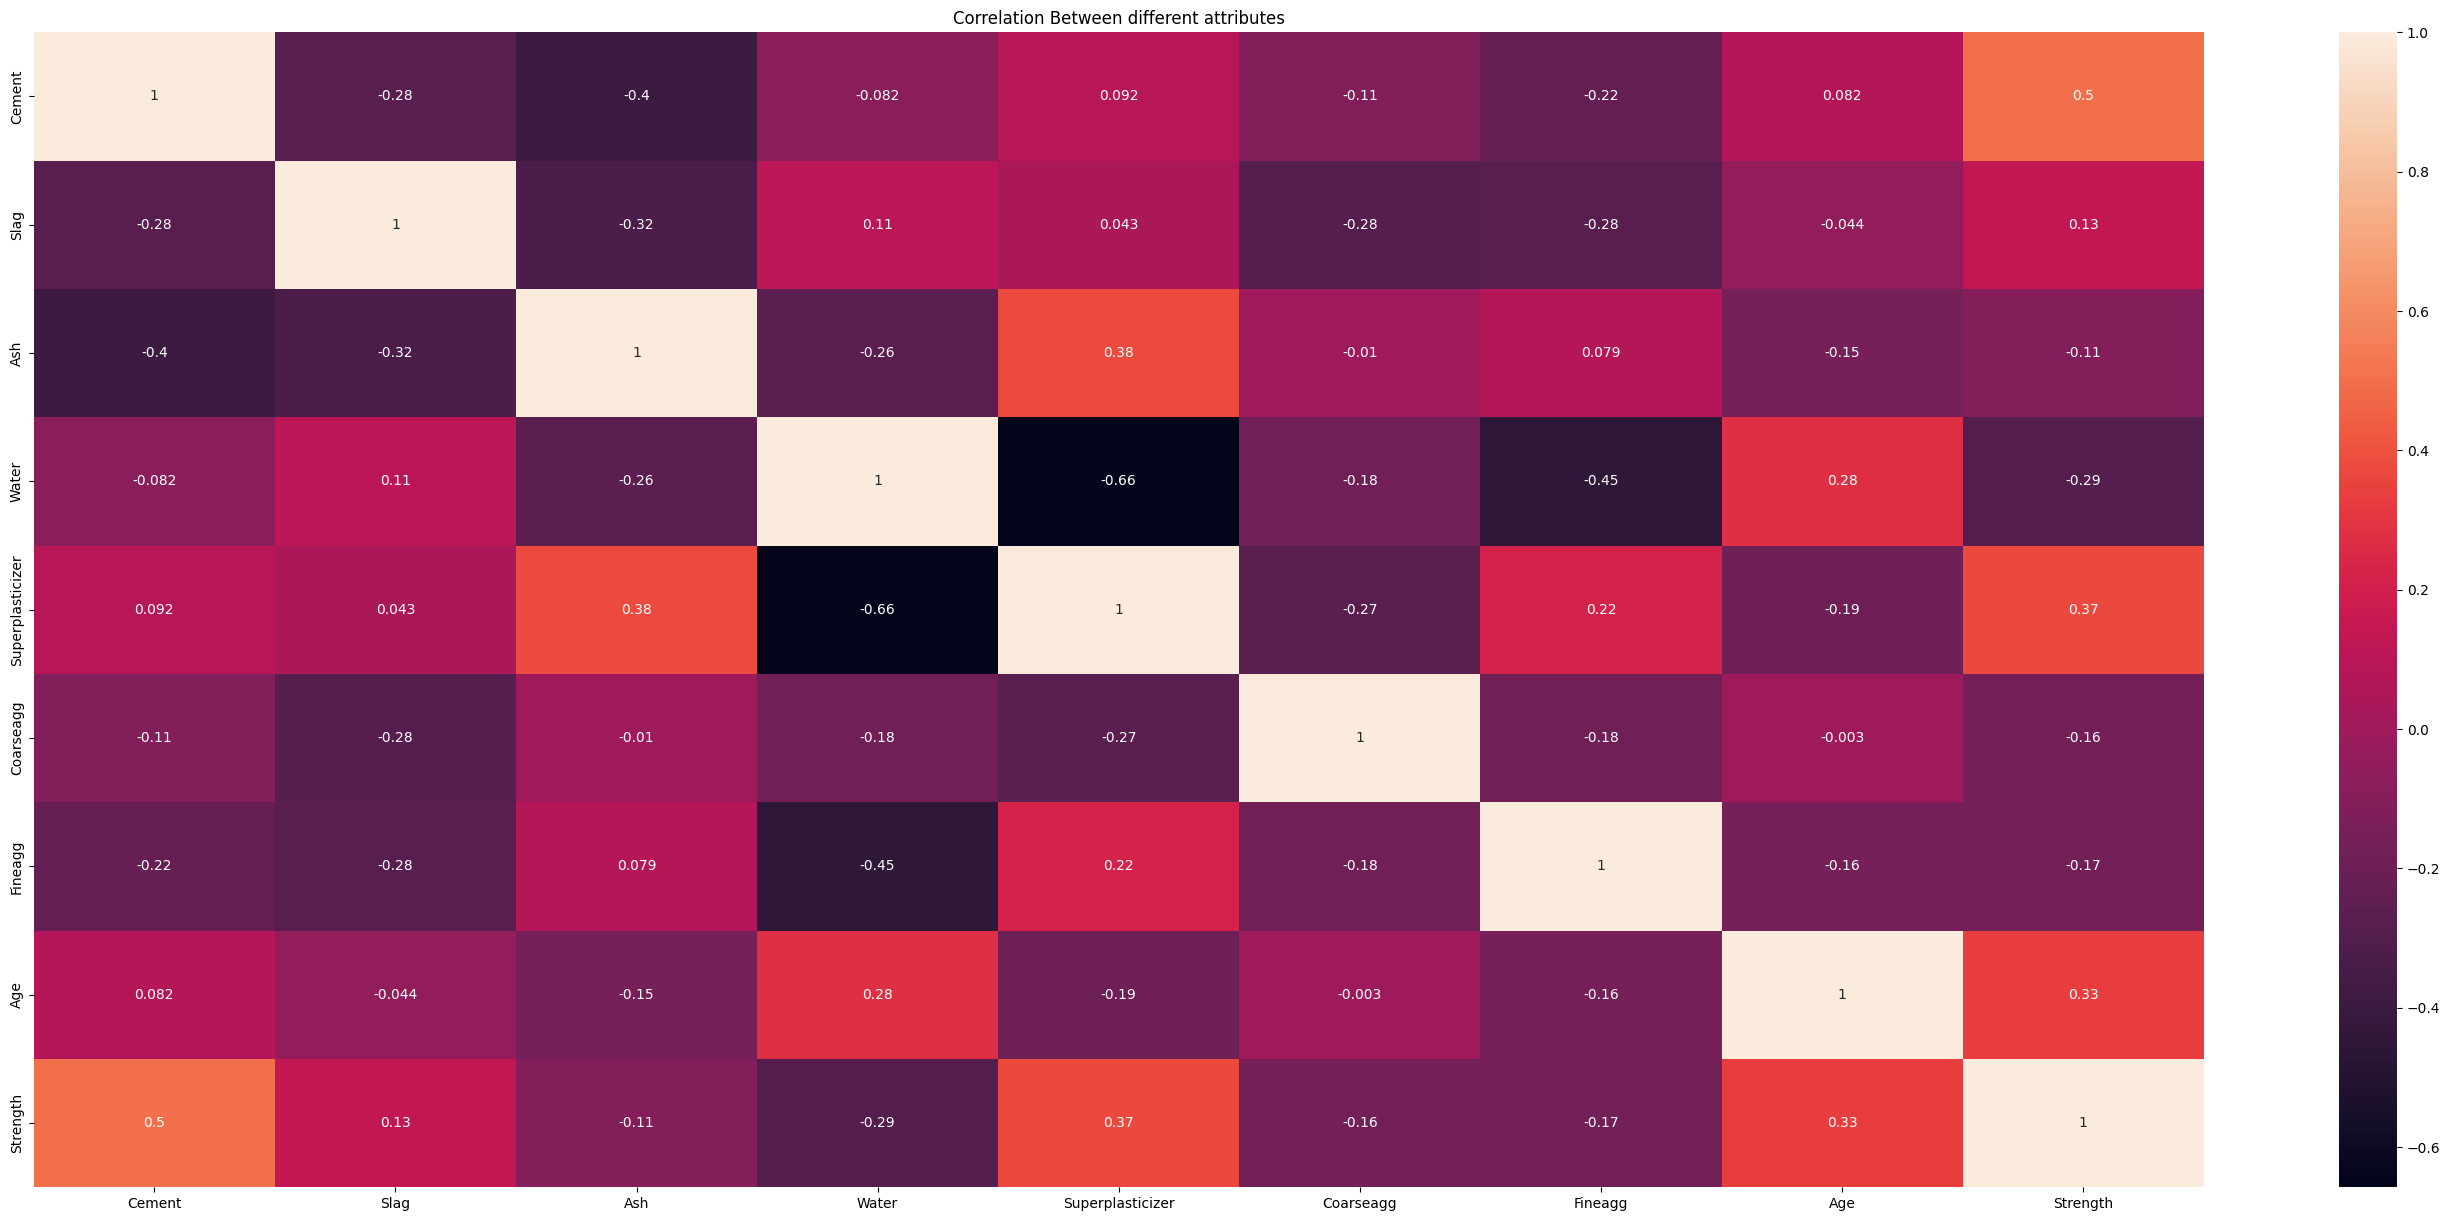

In [41]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Between different attributes")

<Axes: >

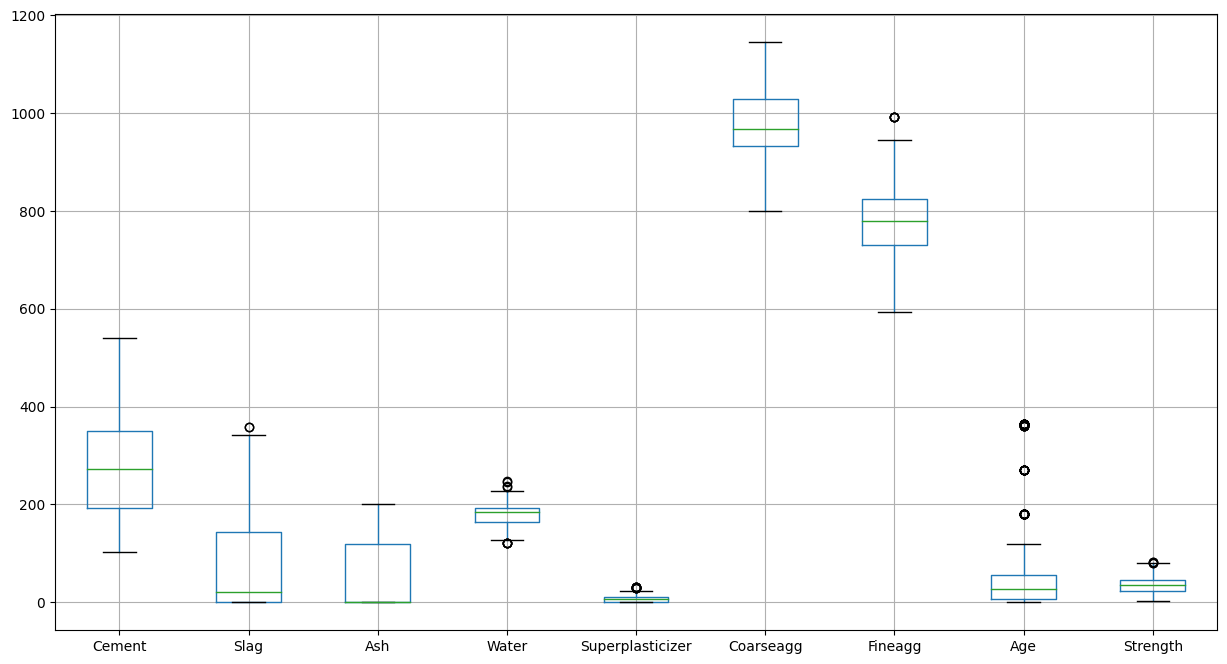

In [42]:
df.boxplot(figsize=(15,8))

In [43]:
## Replacing Outliers by Median
for cols in df.columns[:-1]:
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    iqr=Q3-Q1
    low=Q1-1.5*iqr
    high=Q3+1.5*iqr

    df.loc[(df[cols]<low) | (df[cols]>high), cols]=df[cols].median()

<Axes: >

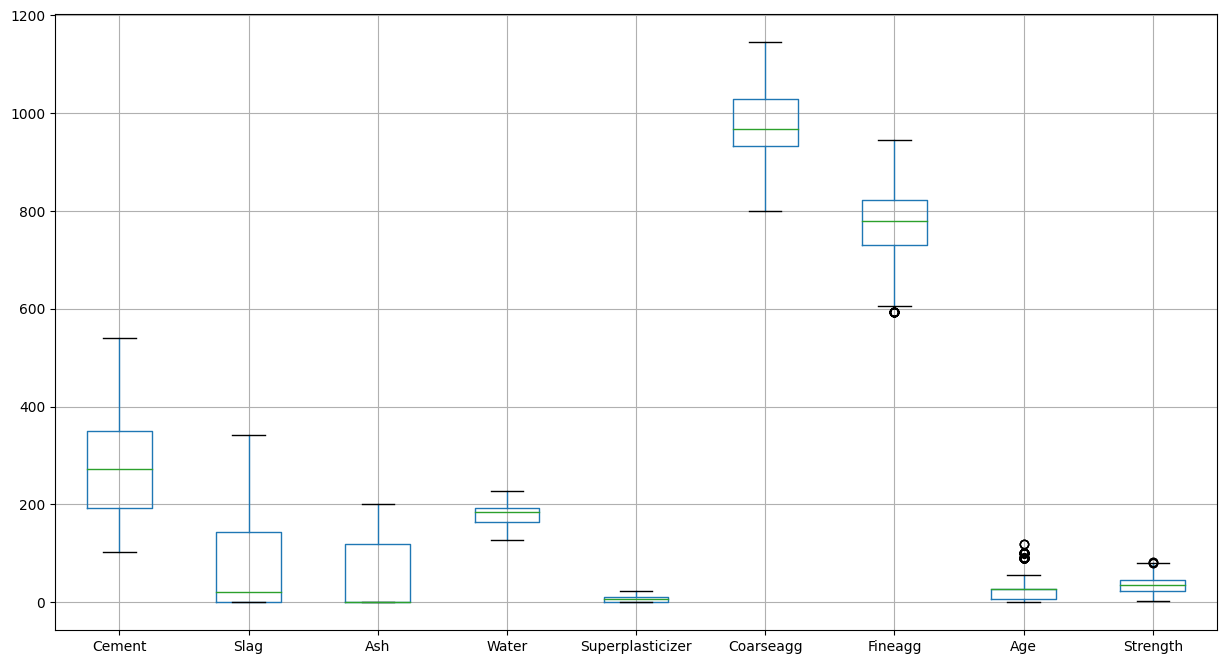

In [44]:
df.boxplot(figsize=(15,8))

## Feature Engineering and Model Building

In [45]:
df.head()

,Cement,Slag,Ash,Water,Superplasticizer,Coarseagg,Fineagg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [46]:
## Splitting Data into independent and dependent features
X=df.drop('Strength',axis=1)
y=df['Strength']

In [47]:
X

,Cement,Slag,Ash,Water,Superplasticizer,Coarseagg,Fineagg,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [48]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [49]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
X_train

,Cement,Slag,Ash,Water,Superplasticizer,Coarseagg,Fineagg,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [52]:
X_test

,Cement,Slag,Ash,Water,Superplasticizer,Coarseagg,Fineagg,Age
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
...,...,...,...,...,...,...,...,...
482,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56
545,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28
110,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7
514,424.0,22.0,132.0,168.0,8.9,822.0,750.0,56


In [53]:
y_train

995    27.68
507    62.05
334    23.80
848    33.40
294     7.40
       ...  
87     24.40
330    42.22
466    33.56
121    68.30
860    38.46
Name: Strength, Length: 824, dtype: float64

In [54]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: Strength, Length: 206, dtype: float64

In [55]:
X_train=X_train.apply(zscore)
X_train

,Cement,Slag,Ash,Water,Superplasticizer,Coarseagg,Fineagg,Age
995,-1.160877,0.877988,0.982449,-0.334146,1.651789,-0.257462,-0.646533,-0.160027
507,1.308623,-0.600720,1.232598,-0.191734,0.467026,-1.926950,-0.265205,-0.160027
334,-0.076865,-0.857076,1.066874,-1.100224,0.722206,1.017859,0.080885,-1.059251
848,-0.291807,0.273221,0.357076,0.593987,0.375890,-1.761654,0.628336,-0.160027
294,-1.065038,-0.365338,1.112214,-1.159153,0.886250,1.363709,0.316226,-1.059251
...,...,...,...,...,...,...,...,...
87,0.027349,1.483921,-0.831134,-1.827017,0.959158,0.394821,0.410614,-1.059251
330,-0.340192,-0.857076,1.124721,-1.895767,1.104975,1.440000,0.375376,-0.663593
466,-0.865914,-0.857076,1.126285,-0.751561,0.722206,1.340822,0.350206,2.429739
121,1.783169,0.527247,-0.831134,-0.039501,0.539934,-1.544226,0.131225,-0.160027


In [56]:
X_test=X_test.apply(zscore)
X_test

,Cement,Slag,Ash,Water,Superplasticizer,Coarseagg,Fineagg,Age
31,-0.070383,0.503663,-0.913524,2.206702,-1.127641,-0.520172,-1.443600,-0.125689
109,0.992599,1.402906,-0.913524,-0.733893,1.010770,-0.348138,-0.301376,-0.882975
136,1.293007,1.402906,-0.913524,-1.619334,2.927965,-0.348138,-0.301376,-0.125689
88,0.992599,1.402906,-0.913524,-0.733893,1.010770,-0.348138,-0.301376,-1.027219
918,-1.401861,-0.863186,1.891362,0.995046,0.347125,-1.983136,1.205614,-0.125689
...,...,...,...,...,...,...,...,...
482,1.910329,-0.575428,0.324387,-0.869040,1.010770,-0.046063,-0.884470,0.884025
545,-0.191426,-0.863186,-0.913524,0.529025,-1.127641,-1.091811,2.217375,-0.125689
110,0.152998,1.545586,-0.913524,-1.675257,0.937031,0.463265,0.336299,-0.882975
514,1.668242,-0.599408,1.154884,-0.589427,0.513036,-2.010228,-0.378589,0.884025


## Building Different Models

### Random Forest

In [ ]:
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor(random_state=42)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
y_pred

array([46.83332929, 49.7568    , 71.4042    , 36.24495   , 11.3114    ,
       43.8329    , 27.846     , 51.7369    , 38.3645    , 42.0546    ,
       44.10840833, 15.0259    , 39.4256    , 34.73192   , 22.5138    ,
       22.1162    , 35.3643    , 19.3868    , 40.3174    , 29.7081    ,
       38.295     , 21.4418    , 45.6144    , 10.5397    , 29.7885    ,
       44.24823333, 11.8659    , 48.94958   , 51.8605    , 16.96613333,
       61.619165  , 38.0143    , 42.6869    , 49.0127    , 13.8542    ,
       44.01000667, 37.3335    , 42.801325  ,  9.3777    , 44.1451    ,
       16.1766    ,  5.0335    , 41.06709333, 52.4935    , 12.826     ,
       64.6942    , 56.03891833, 34.39116333, 30.00578833,  8.0711    ,
       56.1641    , 43.6081    , 27.8843    , 17.3869    , 54.35526083,
       36.6515    , 26.9895    , 13.0313    , 38.2591    , 20.498325  ,
       43.228825  , 15.3644    , 38.0748    , 49.42684   , 35.95264   ,
       14.37      , 36.18059333, 13.6482    , 30.01516667, 26.12

In [ ]:
rf.score(X_train,y_train)

0.9828613385531216

In [ ]:
rf.score(X_test,y_test)

0.8322377331158185

In [ ]:
acc_rf=metrics.r2_score(y_test,y_pred)
acc_rf

<IPython.core.display.Javascript object>

0.8322377331158185

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

43.228459922059024

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid ={
    'n_estimators': (10, 100,200,500,1000),
    'max_features': ('sqrt', 'log2'),
    "criterion":("squared_error", "absolute_error", "friedman_mse", "poisson")
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(rf,param_grid,cv=5)

In [ ]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ('squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'),
                         'max_features': ('sqrt', 'log2'),
                         'n_estimators': (10, 100, 200, 500, 1000)})

In [ ]:
gs.cv_results_['params']

[{'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 10},
 {'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 100},
 {'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 200},
 {'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 500},
 {'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 1000},
 {'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 10},
 {'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 100},
 {'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 200},
 {'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 500},
 {'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 1000},
 {'criterion': 'absolute_error', 'max_features': 'sqrt', 'n_estimators': 10},
 {'criterion': 'absolute_error', 'max_features': 'sqrt', 'n_estimators': 100},
 {'criterion': 'absolute_error', 'max_features': 'sqrt', 'n_est

In [ ]:
gs.best_params_

{'criterion': 'poisson', 'max_features': 'log2', 'n_estimators': 1000}

In [ ]:
rf=RandomForestRegressor(criterion='poisson',max_features='log2',n_estimators=1000,random_state=42)
rf.fit(X_train,y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor(criterion='poisson', max_features='log2',
                      n_estimators=1000, random_state=42)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
rf.score(X_train,y_train)

0.9834361880874044

In [ ]:
rf.score(X_test,y_test)

0.8559264686026309

## Gradient Boosting Regressor

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [ ]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred=gbr.predict(X_test)

In [ ]:
y_pred

array([43.99225814, 50.44497702, 71.62268875, 36.08239625, 15.75194869,
       43.87166519, 24.60002184, 54.19070535, 31.5611894 , 41.74273085,
       41.78154217, 14.15905488, 39.1095086 , 37.01918587, 27.228219  ,
       25.17363638, 37.31630676, 19.06593687, 40.55876417, 24.15024455,
       40.76935663, 26.66885987, 47.1607075 ,  7.37452167, 34.17465064,
       36.62554097, 13.25518082, 50.14485345, 50.19823639, 16.53614814,
       57.23651913, 39.25690658, 46.9416957 , 54.07921163, 16.94487588,
       39.95324284, 30.54776102, 43.25836082, 12.8053051 , 49.16065902,
       12.38332273,  7.75827236, 39.41719005, 55.24689821, 12.24831469,
       75.09322629, 54.60616805, 33.04886059, 32.11086492,  7.85918478,
       49.29194427, 43.9469194 , 24.09007175, 20.9390181 , 58.9605225 ,
       36.62684507, 26.90519323, 14.5027141 , 36.20345762, 28.76150185,
       43.25836082, 14.10725017, 39.01024563, 53.79878504, 30.41069603,
       15.40134452, 40.29591472, 14.84879235, 33.70988165, 25.62

In [ ]:
gbr.score(X_train,y_train)

0.9466192664245636

In [ ]:
gbr.score(X_test,y_test)

0.8369699443239427

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

42.00907843447851

In [ ]:
param_grid ={
    'n_estimators': (10, 100,200,500,1000),
    'max_features': ('auto','sqrt', 'log2'),
    "criterion":("squared_error","friedman_mse"),
    "learning_rate":(0.0001,0.001,0.01,0.1,1),
    "loss":("squared_error", "absolute_error", "huber", "quantile")
}

In [ ]:
gs=GridSearchCV(gbr,param_grid,cv=5)

In [ ]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ('squared_error', 'friedman_mse'),
                         'learning_rate': (0.0001, 0.001, 0.01, 0.1, 1),
                         'loss': ('squared_error', 'absolute_error', 'huber',
                                  'quantile'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': (10, 100, 200, 500, 1000)})

In [ ]:
gs.cv_results_['params']

[{'criterion': 'squared_error',
  'learning_rate': 0.0001,
  'loss': 'squared_error',
  'max_features': 'auto',
  'n_estimators': 10},
 {'criterion': 'squared_error',
  'learning_rate': 0.0001,
  'loss': 'squared_error',
  'max_features': 'auto',
  'n_estimators': 100},
 {'criterion': 'squared_error',
  'learning_rate': 0.0001,
  'loss': 'squared_error',
  'max_features': 'auto',
  'n_estimators': 200},
 {'criterion': 'squared_error',
  'learning_rate': 0.0001,
  'loss': 'squared_error',
  'max_features': 'auto',
  'n_estimators': 500},
 {'criterion': 'squared_error',
  'learning_rate': 0.0001,
  'loss': 'squared_error',
  'max_features': 'auto',
  'n_estimators': 1000},
 {'criterion': 'squared_error',
  'learning_rate': 0.0001,
  'loss': 'squared_error',
  'max_features': 'sqrt',
  'n_estimators': 10},
 {'criterion': 'squared_error',
  'learning_rate': 0.0001,
  'loss': 'squared_error',
  'max_features': 'sqrt',
  'n_estimators': 100},
 {'criterion': 'squared_error',
  'learning_rate'

In [ ]:
gs.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'huber',
 'max_features': 'sqrt',
 'n_estimators': 1000}

In [ ]:
gbr=GradientBoostingRegressor(criterion='squared_error',max_features='sqrt',n_estimators=1000,learning_rate=0.1,loss='huber',random_state=42)
gbr.fit(X_train,y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='sqrt', n_estimators=1000,
                          random_state=42)

In [ ]:
y_pred=gbr.predict(X_test)

In [ ]:
gbr.score(X_train,y_train)

0.9821597577807241

In [ ]:
gbr.score(X_test,y_test)

0.8576098556524259

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

36.69065018342154

## Ada Boost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [ ]:
abr.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
abr.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [ ]:
y_pred=abr.predict(X_test)

In [ ]:
abr.score(X_train,y_train)

0.8231084941155082

In [ ]:
abr.score(X_test,y_test)

0.723967695394695

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

71.12714699463292

In [ ]:
param_grid ={
    'n_estimators': (10, 100,200,500,1000),
    "learning_rate":(0.0001,0.001,0.01,0.1,1),
    "loss":("linear", "square", "exponential")
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(abr,param_grid,cv=5)

In [ ]:
gs.fit(X_train,y_train)

GridSearchCV(cv=20, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': (0.0001, 0.001, 0.01, 0.1, 1),
                         'loss': ('linear', 'square', 'exponential'),
                         'n_estimators': (10, 100, 200, 500, 1000)})

In [ ]:
gs.cv_results_['params']

[{'learning_rate': 0.0001, 'loss': 'linear', 'n_estimators': 10},
 {'learning_rate': 0.0001, 'loss': 'linear', 'n_estimators': 100},
 {'learning_rate': 0.0001, 'loss': 'linear', 'n_estimators': 200},
 {'learning_rate': 0.0001, 'loss': 'linear', 'n_estimators': 500},
 {'learning_rate': 0.0001, 'loss': 'linear', 'n_estimators': 1000},
 {'learning_rate': 0.0001, 'loss': 'square', 'n_estimators': 10},
 {'learning_rate': 0.0001, 'loss': 'square', 'n_estimators': 100},
 {'learning_rate': 0.0001, 'loss': 'square', 'n_estimators': 200},
 {'learning_rate': 0.0001, 'loss': 'square', 'n_estimators': 500},
 {'learning_rate': 0.0001, 'loss': 'square', 'n_estimators': 1000},
 {'learning_rate': 0.0001, 'loss': 'exponential', 'n_estimators': 10},
 {'learning_rate': 0.0001, 'loss': 'exponential', 'n_estimators': 100},
 {'learning_rate': 0.0001, 'loss': 'exponential', 'n_estimators': 200},
 {'learning_rate': 0.0001, 'loss': 'exponential', 'n_estimators': 500},
 {'learning_rate': 0.0001, 'loss': 'exponen

In [ ]:
gs.best_params_

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 500}

In [ ]:
abr=AdaBoostRegressor(learning_rate=1,loss='square',n_estimators=500,random_state=42)
abr.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=500,
                  random_state=42)

In [ ]:
y_pred=abr.predict(X_test)

In [ ]:
abr.score(X_train,y_train)

0.8335130473051249

In [ ]:
abr.score(X_test,y_test)

0.725002254430318

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

70.86056503529814

## KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [60]:
pred_y=knn.predict(X_test)

In [61]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [62]:
knn.score(X_train,y_train)

0.8690282146845835

In [63]:
knn.score(X_test,y_test)

0.7590500542854013

In [64]:
param_grid={"n_neighbors": list(range(1,46)),
    "algorithm":("auto", "ball_tree", "kd_tree", "brute"),
     "weights":("uniform","distance")
}

In [66]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(knn,param_grid,cv=5)

In [67]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ('uniform', 'distance')})

In [68]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbo

In [69]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}

In [71]:
knn=KNeighborsRegressor(algorithm='auto',n_neighbors=4,weights='distance')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [75]:
y_pred=knn.predict(X_test)

In [72]:
knn.score(X_train,y_train)

0.9935875068092143

In [73]:
knn.score(X_test,y_test)

0.8008551042548362

In [76]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

51.31503826391228

## Bagging Regressor

In [78]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor()

In [79]:
bag.fit(X_train,y_train)

BaggingRegressor()

In [80]:
bag.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [81]:
y_pred=bag.predict(X_test)

In [82]:
bag.score(X_train,y_train)

0.9756100915082487

In [83]:
bag.score(X_test,y_test)

0.8160083381105391

In [84]:
param_grid ={
    'n_estimators': (10, 100,200,500,1000)
}

In [85]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(bag,param_grid,cv=5)

In [86]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'n_estimators': (10, 100, 200, 500, 1000)})

In [87]:
gs.cv_results_['params']

[{'n_estimators': 10},
 {'n_estimators': 100},
 {'n_estimators': 200},
 {'n_estimators': 500},
 {'n_estimators': 1000}]

In [88]:
gs.best_params_

{'n_estimators': 100}

In [89]:
bag=BaggingRegressor(n_estimators=100,random_state=42)

In [90]:
bag.fit(X_train,y_train)

BaggingRegressor(n_estimators=100, random_state=42)

In [91]:
y_pred=bag.predict(X_test)

In [92]:
bag.score(X_train,y_train)

0.9829172411336332

In [93]:
bag.score(X_test,y_test)

0.8326176177481965

In [94]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

43.130572429771526

## Support Vector Regressor

In [96]:
from sklearn.svm import SVR
svr=SVR()

In [97]:
svr.fit(X_train,y_train)

SVR()

In [98]:
y_pred=svr.predict(X_test)

In [99]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [100]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

80.45375290258188

In [101]:
svr.score(X_train,y_train)

0.7445561048691318

In [102]:
svr.score(X_test,y_test)

0.6877727314224882

In [110]:
param_grid = {'C': (0.1, 1, 10, 100, 1000),
              'gamma': ('scale','auto'),
              'kernel': ('linear','poly','rbf','sigmoid')
              }

In [111]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(svr,param_grid,cv=5)

In [112]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': (0.1, 1, 10, 100, 1000),
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [113]:
gs.cv_results_['params']

[{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'},
 {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'},
 {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'},
 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'},
 {'C': 1, 'gamma': 'scale', 'kernel': 'linear'},
 {'C': 1, 'gamma': 'scale', 'kernel': 'poly'},
 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'},
 {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'},
 {'C': 1, 'gamma': 'auto', 'kernel': 'linear'},
 {'C': 1, 'gamma': 'auto', 'kernel': 'poly'},
 {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'},
 {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'},
 {'C': 10, 'gamma': 'scale', 'kernel': 'linear'},
 {'C': 10, 'gamma': 'scale', 'kernel': 'poly'},
 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'},
 {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'},
 {'C': 10, 'gamma': 'auto', 

In [114]:
gs.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

In [116]:
svr=SVR(C=100,gamma='auto',kernel='rbf')

In [117]:
svr.fit(X_train,y_train)

SVR(C=100, gamma='auto')

In [118]:
y_pred=svr.predict(X_test)

In [119]:
svr.score(X_train,y_train)

0.9507511644895038

In [120]:
svr.score(X_test,y_test)

0.8384575608327833

In [121]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

41.625754032476905

## XG Boost Regressor

In [59]:
from xgboost.sklearn import XGBRegressor
xgr=XGBRegressor()

In [60]:
xgr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [61]:
xgr.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [62]:
y_pred=xgr.predict(X_test)

In [63]:
xgr.score(X_train,y_train)

0.9927856094533439

In [64]:
xgr.score(X_test,y_test)

0.8311947104551117

In [65]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

43.49722276202047

In [77]:
param_grid ={
    'n_estimators': (10, 100,200,500,1000),
    "learning_rate":(0.0001,0.001,0.01,0.1,1),
}

In [78]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(xgr,param_grid,cv=5)

In [79]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': (0.0001, 0.001, 0.01, 0.1, 1),
                         'n_estimators': (10, 100, 200, 500, 1000)})

In [80]:
gs.cv_results_['params']

[{'learning_rate': 0.0001, 'n_estimators': 10},
 {'learning_rate': 0.0001, 'n_estimators': 100},
 {'learning_rate': 0.0001, 'n_estimators': 200},
 {'learning_rate': 0.0001, 'n_estimators': 500},
 {'learning_rate': 0.0001, 'n_estimators': 1000},
 {'learning_rate': 0.001, 'n_estimators': 10},
 {'learning_rate': 0.001, 'n_estimators': 100},
 {'learning_rate': 0.001, 'n_estimators': 200},
 {'learning_rate': 0.001, 'n_estimators': 500},
 {'learning_rate': 0.001, 'n_estimators': 1000},
 {'learning_rate': 0.01, 'n_estimators': 10},
 {'learning_rate': 0.01, 'n_estimators': 100},
 {'learning_rate': 0.01, 'n_estimators': 200},
 {'learning_rate': 0.01, 'n_estimators': 500},
 {'learning_rate': 0.01, 'n_estimators': 1000},
 {'learning_rate': 0.1, 'n_estimators': 10},
 {'learning_rate': 0.1, 'n_estimators': 100},
 {'learning_rate': 0.1, 'n_estimators': 200},
 {'learning_rate': 0.1, 'n_estimators': 500},
 {'learning_rate': 0.1, 'n_estimators': 1000},
 {'learning_rate': 1, 'n_estimators': 10},
 {'lear

In [81]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [82]:
xgr=XGBRegressor(learning_rate=0.1,n_estimators=200)

In [83]:
xgr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [84]:
y_pred=xgr.predict(X_test)

In [85]:
xgr.score(X_train,y_train)

0.9911339631507851

In [86]:
xgr.score(X_test,y_test)

0.8456531109309017

In [87]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

39.771627029958395

## Decision Tree Regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [89]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [90]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [92]:
y_pred=dtr.predict(X_test)

In [93]:
dtr.score(X_train,y_train)

0.9935875068092143

In [94]:
dtr.score(X_test,y_test)

0.7161624100315647

In [95]:
param_grid={"splitter":("best","random"),
            "criterion":("squared_error", "friedman_mse", "absolute_error", "poisson")
            }

In [97]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(dtr,param_grid,cv=5)

In [98]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'),
                         'splitter': ('best', 'random')})

In [99]:
gs.cv_results_['params']

[{'criterion': 'squared_error', 'splitter': 'best'},
 {'criterion': 'squared_error', 'splitter': 'random'},
 {'criterion': 'friedman_mse', 'splitter': 'best'},
 {'criterion': 'friedman_mse', 'splitter': 'random'},
 {'criterion': 'absolute_error', 'splitter': 'best'},
 {'criterion': 'absolute_error', 'splitter': 'random'},
 {'criterion': 'poisson', 'splitter': 'best'},
 {'criterion': 'poisson', 'splitter': 'random'}]

In [100]:
gs.best_params_

{'criterion': 'absolute_error', 'splitter': 'random'}

In [101]:
dtr=DecisionTreeRegressor(criterion="absolute_error",splitter='random',random_state=42)

In [102]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=42,
                      splitter='random')

In [103]:
y_pred=dtr.predict(X_test)

In [104]:
dtr.score(X_train,y_train)

0.9929211104103399

In [105]:
dtr.score(X_test,y_test)

0.705862605088526

In [106]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

75.7924104368932